In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

# The features in this dataset


Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

* **amount_tsh** - Total static head (amount water available to waterpoint)
* **date_recorded** - The date the row was entered
* **funder** - Who funded the well
* **gps_height** - Altitude of the well
* **installer** - Organization that installed the well
* **longitude** - GPS coordinate
* **latitude** - GPS coordinate
* **wpt_name** - Name of the waterpoint if there is one
* **num_private** -
* **basin** - Geographic water basin
* **subvillage** - Geographic location
* **region** - Geographic location
* **region_code** - Geographic location (coded)
* **district_code** - Geographic location (coded)
* **lga** - Geographic location
* **ward** - Geographic location
* **population** - Population around the well
* **public_meeting** - True/False
* **recorded_by** - Group entering this row of data
* **scheme_management** - Who operates the waterpoint
* **scheme_name** - Who operates the waterpoint
* **permit** - If the waterpoint is permitted
* **construction_year** - Year the waterpoint was constructed
* **extraction_type** - The kind of extraction the waterpoint uses
* **extraction_type_group** - The kind of extraction the waterpoint uses
* **extraction_type_class** - The kind of extraction the waterpoint uses
* **management** - How the waterpoint is managed
* **management_group** - How the waterpoint is managed
* **payment** - What the water costs
* **payment_type** - What the water costs
* **water_quality** - The quality of the water
* **quality_group** - The quality of the water
* **quantity** - The quantity of water
* **quantity_group** - The quantity of water
* **source** - The source of the water
* **source_type** - The source of the water
* **source_class** - The source of the water
* **waterpoint_type** - The kind of waterpoint
* **waterpoint_type_group** - The kind of waterpoint



Distribution of Labels
The labels in this dataset are simple. There are three possible values:

* **functional** - the waterpoint is operational and there are no repairs needed
* **functional needs repair** - the waterpoint is operational, but needs repairs
* **non functional** - the waterpoint is not operational


In [2]:
# looking at the test values data

test_values = pd.read_csv('data/test_set_values.csv')
test_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [3]:
# seeing how many values are in each columns

test_values.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
r

In [4]:
test_values.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [5]:
# how many missing values are in each column

test_values.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [6]:
# if there are any duplicated values

test_values.duplicated().sum()

0

In [7]:
# looking at the training labels data

training_labels = pd.read_csv('data/training_set_labels.csv')
training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
# looks like we want to focus on the status group to see 
# the functional water wells

In [9]:
training_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [10]:
# seeing how many are in each group

training_labels.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

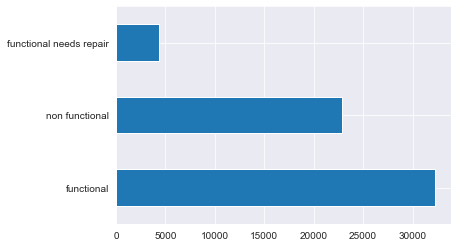

In [71]:
sns.set_style('darkgrid')
training_labels.status_group.value_counts().plot(kind = 'barh')

In [12]:
# looking at the training values data

training_values = pd.read_csv('data/training_set_values.csv')
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [13]:
# merging the training values and training labels on 'id' column

merged = pd.merge(training_values, training_labels, on = 'id')
merged.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [14]:
display(merged.shape)
display(test_values.shape)

(59400, 41)

(14850, 40)

In [15]:
merged.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [16]:
merged.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [17]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [18]:
merged.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [19]:
merged.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [20]:
print(merged.construction_year.head())
print('------------')
print(merged.date_recorded.head())

0    1999
1    2010
2    2009
3    1986
4       0
Name: construction_year, dtype: int64
------------
0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
Name: date_recorded, dtype: object


In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [22]:
merged.construction_year.unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965])

In [23]:
# creating bins for construction years to put into time periods



In [24]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
periods = ['1960 - 1960', '1970 - 1979', '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2015']

merged['construction_periods'] = pd.cut(merged['construction_year'], bins, labels = periods, right = False)


In [25]:
merged.construction_periods.value_counts()

2000 - 2009    15330
1990 - 1999     7678
1980 - 1989     5578
2010 - 2015     5161
1970 - 1979     4406
1960 - 1960      538
Name: construction_periods, dtype: int64

In [26]:
# dropping construction year since i made construction periods 

merged = merged.drop('construction_year', axis = 1)

In [27]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [28]:
# finding what i want to focus on and what to drop since it looks like there are some columns 
# that might have the same info

In [29]:
# droppping scheme name since it has too many unknown values

merged = merged.drop('scheme_name', axis = 1)
test_values = test_values.drop('scheme_name', axis = 1)

In [30]:
merged[['extraction_type', 'extraction_type_group', 'extraction_type_class']].head(10)

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity
5,submersible,submersible,submersible
6,swn 80,swn 80,handpump
7,nira/tanira,nira/tanira,handpump
8,india mark ii,india mark ii,handpump
9,nira/tanira,nira/tanira,handpump


In [31]:
# dropping extraction_type and extraction_type_group since extraction_type_class looks
# like it has the most general classification for the types of extraction

merged = merged.drop(columns = ['extraction_type', 'extraction_type_group'], axis = 1)
test_values = test_values.drop(columns = ['extraction_type', 'extraction_type_group'], axis = 1)

In [32]:
# dropping payment_type since its the same as payment
merged[['payment', 'payment_type']].head(10)

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
5,pay per bucket,per bucket
6,never pay,never pay
7,unknown,unknown
8,never pay,never pay
9,never pay,never pay


In [33]:


merged = merged.drop('payment', axis = 1)
test_values = test_values.drop('payment', axis = 1)

In [34]:
# looking at quantity and quantity group

merged[['quantity', 'quantity_group']].head(10)

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
5,enough,enough
6,enough,enough
7,enough,enough
8,seasonal,seasonal
9,enough,enough


In [35]:
# dropping quantity_group

merged = merged.drop('quantity_group', axis = 1)
test_values = test_values.drop('quantity_group', axis = 1)

In [36]:
# looking at quality_group and water_quality

merged[['quality_group', 'water_quality']].head(10)

,quality_group,water_quality
0,good,soft
1,good,soft
2,good,soft
3,good,soft
4,good,soft
5,salty,salty
6,good,soft
7,milky,milky
8,salty,salty
9,good,soft


In [37]:
# dropping quality_group since water_quality better explains it

merged = merged.drop('quality_group', axis = 1)
test_values = test_values.drop('quality_group', axis = 1)

In [38]:
# source, source_type, and source_class

merged[['source', 'source_type', 'source_class']].head(10)

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
5,other,other,unknown
6,machine dbh,borehole,groundwater
7,shallow well,shallow well,groundwater
8,machine dbh,borehole,groundwater
9,shallow well,shallow well,groundwater


In [39]:
# dropping source_type and source_class.  i think source is more specific

merged = merged.drop(columns = ['source_type', 'source_class'], axis = 1)
test_values = test_values.drop(columns = ['source_type', 'source_class'], axis = 1)

In [40]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 33 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [41]:
# waterpoint_type and waterpoint_type_group both look the same

merged[['waterpoint_type', 'waterpoint_type_group']].head(10)

,waterpoint_type,waterpoint_type_group
0,communal standpipe,communal standpipe
1,communal standpipe,communal standpipe
2,communal standpipe multiple,communal standpipe
3,communal standpipe multiple,communal standpipe
4,communal standpipe,communal standpipe
5,communal standpipe multiple,communal standpipe
6,hand pump,hand pump
7,hand pump,hand pump
8,hand pump,hand pump
9,hand pump,hand pump


In [42]:
# dropping waterpoint_type_group

merged = merged.drop('waterpoint_type_group', axis = 1)
test_values = test_values.drop('waterpoint_type_group', axis = 1)

In [43]:
# management and management_group. managenment_group doesnt tell me anything

merged[['management', 'management_group']].head(10)

,management,management_group
0,vwc,user-group
1,wug,user-group
2,vwc,user-group
3,vwc,user-group
4,other,other
5,vwc,user-group
6,vwc,user-group
7,wug,user-group
8,vwc,user-group
9,vwc,user-group


In [44]:
merged = merged.drop('management_group', axis = 1)
test_values = test_values.drop('management_group', axis = 1)

In [45]:
# scheme_management and management

merged[['scheme_management', 'management']].head(10)

,scheme_management,management
0,VWC,vwc
1,Other,wug
2,VWC,vwc
3,VWC,vwc
4,NaN,other
5,VWC,vwc
6,VWC,vwc
7,NaN,wug
8,VWC,vwc
9,NaN,vwc


In [46]:
# drop scheme_management

merged = merged.drop('scheme_management', axis = 1)
test_values = test_values.drop('scheme_management', axis = 1)

In [47]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [48]:
# dropping num_private there are too many zeros
merged.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [49]:
merged = merged.drop('num_private', axis = 1)
test_values = test_values.drop('num_private', axis = 1)

In [50]:
# drop recorded_by since its all the same company

print(merged.recorded_by.unique())
print(merged.recorded_by.nunique())
print(merged.recorded_by.value_counts())

['GeoData Consultants Ltd']
1
GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64


In [51]:
merged = merged.drop('recorded_by', axis = 1)
test_values = test_values.drop('recorded_by', axis = 1)

In [52]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 27 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
permit                   14113 non-null object


In [53]:
merged.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [54]:
merged.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

Text(0.5, 1.0, 'value counts of pump status')

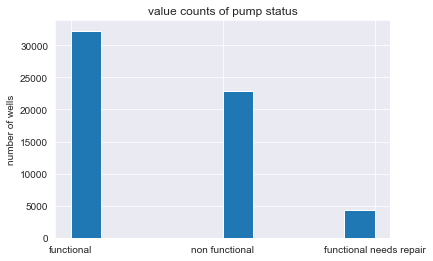

In [55]:
merged['status_group'].hist()
plt.ylabel('number of wells')
plt.title('value counts of pump status')

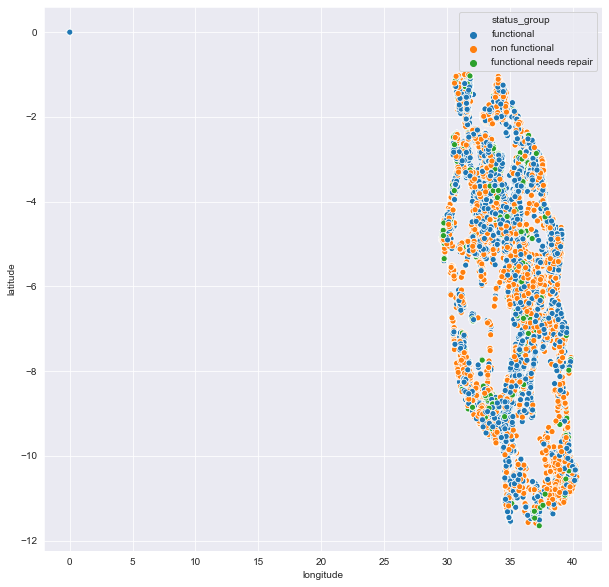

In [56]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'longitude', y = 'latitude',hue = 'status_group', data = merged)

In [68]:
merged.to_csv('clean_merged.csv')
test_values.to_csv('clean_test.csv')